In [24]:
import lightkurve as lk
import matplotlib.pyplot as plt
import numpy as np

In [25]:
TIC="TIC 284475976"

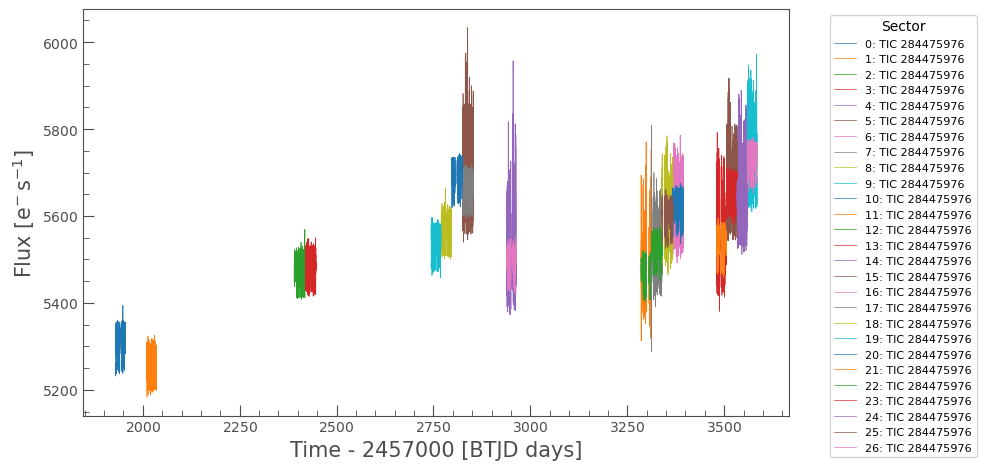

In [26]:
sec= lk.search_lightcurve(TIC, author='SPOC')
data_all=sec.download_all()
data_all.plot()
plt.legend(title="Sector", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
plt.gcf().set_size_inches(10, 5)  # Adjust width & height
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()  
plt.show()

In [27]:
# norm_data=data_all.stitch()
# norm_data.plot(linewidth=0, marker='.', alpha=0.4)

# plt.show()

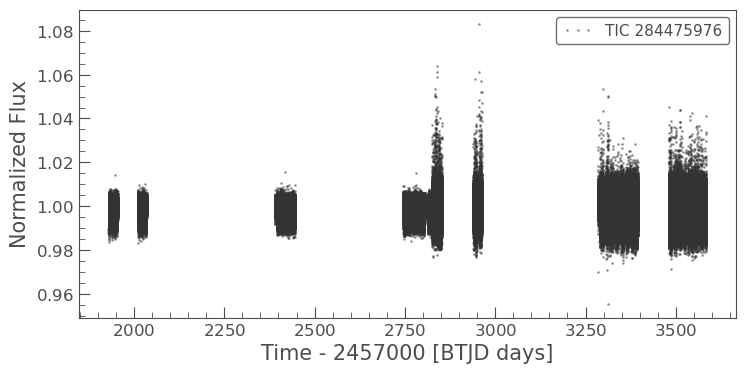

In [28]:
norm_data=data_all.stitch()
norm_data.plot(linewidth=0, marker='.', alpha=0.4)

plt.show()

In [29]:
time = norm_data.time.value  # Convert to plain numerical values
flux = norm_data.flux.value  # Convert masked quantity to numerical values


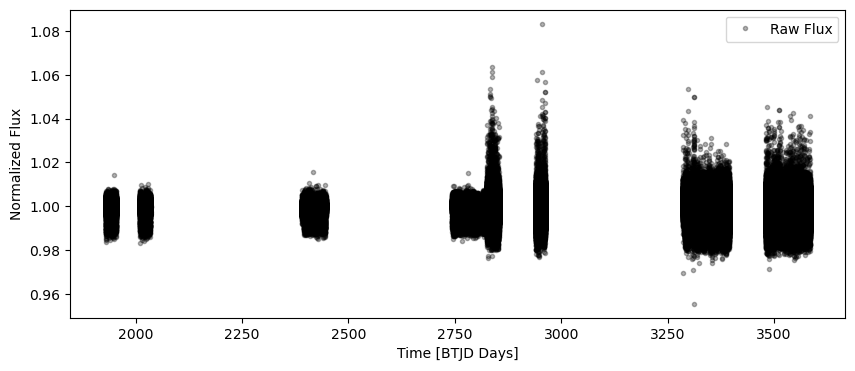

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Convert to plain numerical arrays
time = norm_data.time.value
flux = norm_data.flux.value

# Remove masked/NaN values
mask = np.isfinite(time) & np.isfinite(flux)

# Plot cleaned light curve
plt.figure(figsize=(10, 4))
plt.plot(time[mask], flux[mask], 'k.', alpha=0.3, label='Raw Flux')
plt.xlabel("Time [BTJD Days]")
plt.ylabel("Normalized Flux")
plt.legend()
plt.show()


In [31]:
print(type(norm_data))
print(norm_data.columns)  # Check available column names
print(norm_data.time[:10])  # Display the first 10 time values
print(norm_data.flux[:10])  # Display the first 10 flux values


<class 'lightkurve.lightcurve.TessLightCurve'>
<TableColumns names=('time','flux','flux_err','timecorr','cadenceno','centroid_col','centroid_row','sap_flux','sap_flux_err','sap_bkg','sap_bkg_err','pdcsap_flux','pdcsap_flux_err','quality','psf_centr1','psf_centr1_err','psf_centr2','psf_centr2_err','mom_centr1','mom_centr1_err','mom_centr2','mom_centr2_err','pos_corr1','pos_corr2')>
[1928.10399746 1928.10538637 1928.10677527 1928.10816418 1928.10955308
 1928.11094199 1928.1123309  1928.1137198  1928.11510871 1928.11649762]
[——— ——— ——— ——— ——— ——— ——— ——— ——— ———]


In [32]:
from scipy.ndimage import median_filter

# Apply a moving median filter
smoothed_flux = median_filter(norm_data.flux, size=15)  # Adjust size for best results

# Plot the smoothed light curve
plt.figure(figsize=(10, 4))
plt.plot(norm_data.time, norm_data.flux, 'k.', alpha=0.3, label='Raw Flux')
plt.plot(norm_data.time, smoothed_flux, 'r-', label='Smoothed Flux')
plt.xlabel("Time [BTJD Days]")
plt.ylabel("Normalized Flux")
plt.legend()
plt.show()


ValueError: setting an array element with a sequence.

In [ ]:
from astropy.stats import sigma_clip

# Apply sigma clipping
clean_flux = sigma_clip(norm_data.flux, sigma=3, maxiters=5, masked=False)

# Plot the cleaned light curve
plt.figure(figsize=(10, 4))
plt.plot(norm_data.time, norm_data.flux, 'k.', alpha=0.3, label='Raw Flux')
plt.plot(norm_data.time, clean_flux, 'b.', alpha=0.5, label='Cleaned Flux')
plt.xlabel("Time [BTJD Days]")
plt.ylabel("Normalized Flux")
plt.legend()
plt.show()


In [ ]:
from scipy.signal import savgol_filter

# Apply Savitzky-Golay filter for detrending
detrended_flux = norm_data.flux - savgol_filter(norm_data.flux, window_length=101, polyorder=2)

# Plot detrended light curve
plt.figure(figsize=(10, 4))
plt.plot(norm_data.time, norm_data.flux, 'k.', alpha=0.3, label='Raw Flux')
plt.plot(norm_data.time, detrended_flux, 'g-', label='Detrended Flux')
plt.xlabel("Time [BTJD Days]")
plt.ylabel("Normalized Flux")
plt.legend()
plt.show()


ValueError: setting an array element with a sequence.

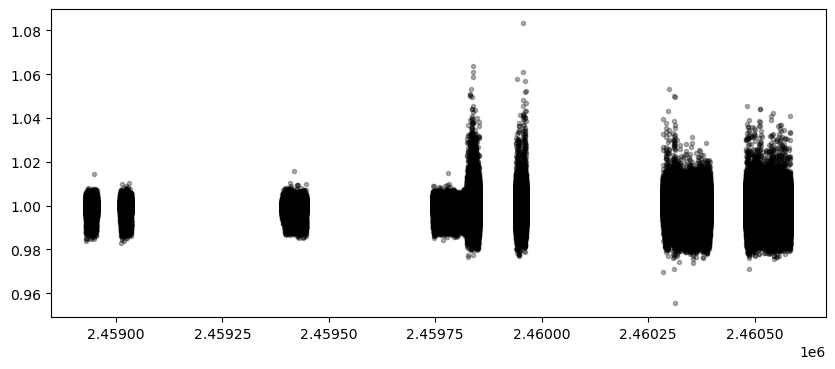

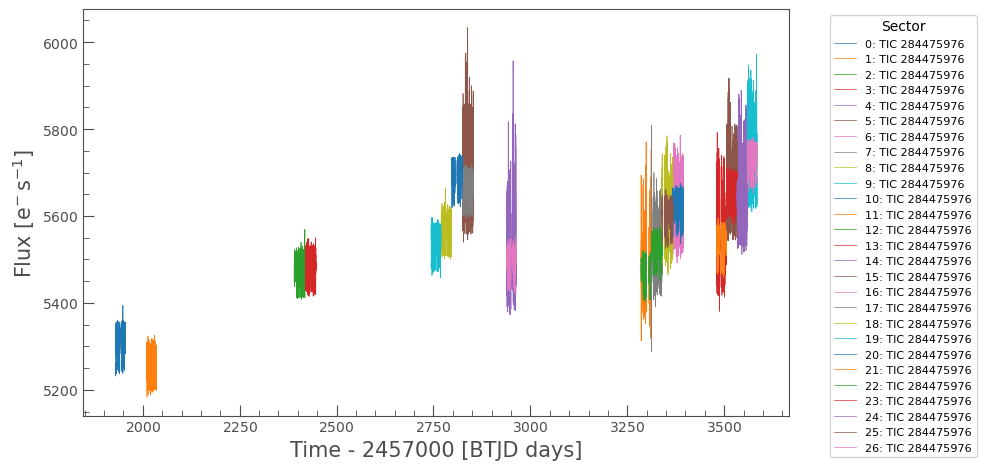

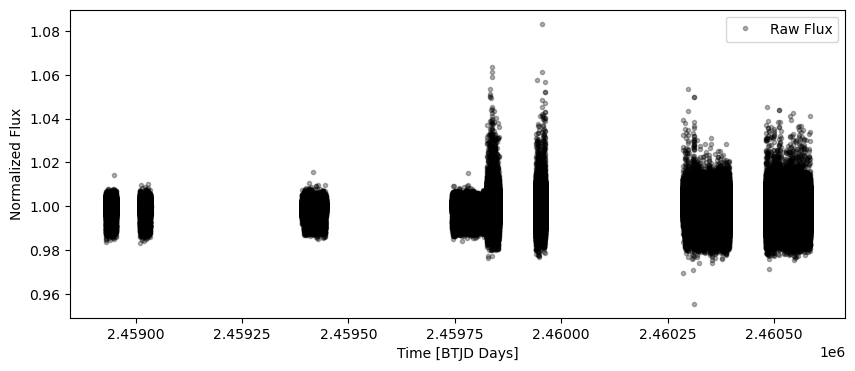

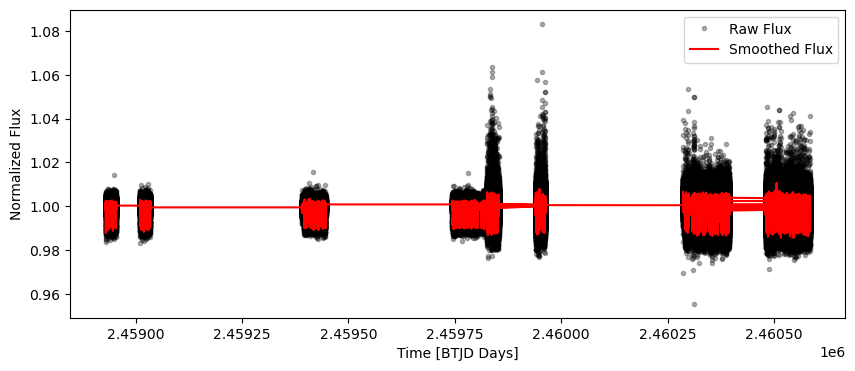

ValueError: x and y must have same first dimension, but have shapes (1143875,) and (1130340,)

In [34]:
import lightkurve as lk
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import median_filter
from scipy.signal import savgol_filter
from astropy.stats import sigma_clip

# Download TESS data for the target star
TIC = "TIC 284475976"
sec = lk.search_lightcurve(TIC, author='SPOC')
data_all = sec.download_all()

# Plot all available sectors
data_all.plot()
plt.legend(title="Sector", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
plt.gcf().set_size_inches(10, 5)  # Adjust figure size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()  
plt.show()

# Stitch all sectors together
norm_data = data_all.stitch()

# Convert Time and Flux to proper numerical values
time = norm_data.time.to_value('jd')  # Convert time to Julian Days
flux = norm_data.flux.filled(np.nan)  # Convert MaskedQuantity to array and fill NaNs

# Remove NaN or invalid values
mask = np.isfinite(time) & np.isfinite(flux)
time_clean = time[mask]
flux_clean = flux[mask]

# Plot cleaned light curve
plt.figure(figsize=(10, 4))
plt.plot(time_clean, flux_clean, 'k.', alpha=0.3, label='Raw Flux')
plt.xlabel("Time [BTJD Days]")
plt.ylabel("Normalized Flux")
plt.legend()
plt.show()

# Apply a median filter for noise reduction
smoothed_flux = median_filter(flux_clean, size=15)  # Adjust size for best results

# Plot smoothed light curve
plt.figure(figsize=(10, 4))
plt.plot(time_clean, flux_clean, 'k.', alpha=0.3, label='Raw Flux')
plt.plot(time_clean, smoothed_flux, 'r-', label='Smoothed Flux')
plt.xlabel("Time [BTJD Days]")
plt.ylabel("Normalized Flux")
plt.legend()
plt.show()

# Apply sigma clipping to remove outliers
clean_flux = sigma_clip(flux_clean, sigma=3, maxiters=5, masked=False)

# Plot the cleaned light curve
plt.figure(figsize=(10, 4))
plt.plot(time_clean, flux_clean, 'k.', alpha=0.3, label='Raw Flux')
plt.plot(time_clean, clean_flux, 'b.', alpha=0.5, label='Cleaned Flux')
plt.xlabel("Time [BTJD Days]")
plt.ylabel("Normalized Flux")
plt.legend()
plt.show()

# Apply Savitzky-Golay filter for detrending
window_length = min(101, len(flux_clean) // 2 * 2 + 1)  # Ensure odd window length
detrended_flux = flux_clean - savgol_filter(flux_clean, window_length=window_length, polyorder=2)

# Plot detrended light curve
plt.figure(figsize=(10, 4))
plt.plot(time_clean, flux_clean, 'k.', alpha=0.3, label='Raw Flux')
plt.plot(time_clean, detrended_flux, 'g-', label='Detrended Flux')
plt.xlabel("Time [BTJD Days]")
plt.ylabel("Normalized Flux")
plt.legend()
plt.show()
